In [1]:
from LSSTFringe import Sky_rubin, utils, plot_utils,TMMSIM
%pylab inline
import rubin_sim.utils.ObservationMetaData as ObsMeta 
import galsim
from scipy import interpolate
import warnings
import os
import pickle
import tmm

index_of_refraction = utils.load_refraction_data(Epoxy_ind=1.6,Temp = 173.)
from tqdm import tqdm
from astropy.io import fits

plot_utils.init_plot_style()
HSC_y_path = 'data/throughputs/HSC/y_HSC.txt'
HSC_qe_path = 'data/throughputs/HSC/qe_ccd_HSC.txt'

def load_txt(f_name):
    wlen = np.loadtxt(f_name,usecols=0)
    thr = np.loadtxt(f_name,usecols=1)
    
    return(wlen,thr)

HSC_y_wlen,HSC_y_thr  =load_txt(HSC_y_path)
HSC_qe_wlen,HSC_qe  =load_txt(HSC_qe_path)

Populating the interactive namespace from numpy and matplotlib


In [2]:
detector_f = 'data/throughputs/baseline/detector.dat'
wave = numpy.loadtxt(detector_f,usecols=[0])
detector = numpy.loadtxt(detector_f,usecols=[1])

In [3]:
index_of_refraction = utils.load_refraction_data(Epoxy_ind=1.6,Temp = 215.) # default 215
QE = []
wavelength = np.arange(480,1100,0.1)
pol = 's'
for wlen in tqdm(wavelength):
    material = ('Vacuum', 'MgF2','Ta2O5', 'Si_Temp', 'SiO2', 'Si_Temp', 'SiO2','Epoxy','Si_Temp','Si3N4')
    n_list = np.array([index_of_refraction[m](wlen) for m in material])
    thickness_um = np.array([np.inf, 0.1221,0.0441,100, 0.1, 0.3,1.,14,165, np.inf])
    Res = TMMSIM.coh_tmm(pol, n_list, thickness_um,0, 1e-3 * wlen)
    Abor_prob = TMMSIM.absorp_in_each_layer(Res)[3]
    QE.append(Abor_prob)

100%|██████████████████████████████████████| 6200/6200 [00:06<00:00, 986.19it/s]


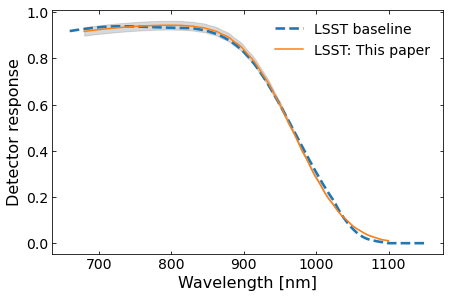

In [4]:
N = 1000
qe_boxcar = np.convolve(QE, np.ones(N)/N, mode='same')
plt.figure(figsize = (7,4.5))
plt.plot(wave[3600:],detector[3600:],ls = '--',linewidth = 2.6, label = 'LSST baseline')
plt.plot(wavelength[2000:],qe_boxcar[2000:],linewidth = 1.5, label = 'LSST: This paper')

plt.fill_between(wavelength[2000:], qe_boxcar[2000:] - qe_boxcar[2000:]*0.02, qe_boxcar[2000:] +qe_boxcar[2000:]*0.02,
                 color='grey', alpha=0.3)

plt.xlabel('Wavelength [nm]',fontsize = 16)
plt.ylabel('Detector response',fontsize = 16)
plt.legend(fontsize = 14,frameon = False)
#plt.plot(wavelength,QE2)
plt.yticks(fontsize = 14)
plt.xticks(fontsize=14);

In [5]:
index_of_refraction = utils.load_refraction_data(Epoxy_ind=1.6,Temp = 215.) # default 215
QE = []
wavelength = np.arange(480,1100,0.1)
pol = 's'
for wlen in tqdm(wavelength):
    material = ('Vacuum', 'MgF2','Ta2O5', 'Si_Temp', 'SiO2', 'Si_Temp', 'SiO2','Epoxy','Si_Temp','Si3N4')
    n_list = np.array([index_of_refraction[m](wlen) for m in material])
    thickness_um = np.array([np.inf, 0.1221,0.0441,200, 0.1, 0.3,1.,14,165, np.inf])
    Res = TMMSIM.coh_tmm(pol, n_list, thickness_um,0, 1e-3 * wlen)
    Abor_prob = TMMSIM.absorp_in_each_layer(Res)[3]
    QE.append(Abor_prob)

100%|█████████████████████████████████████| 6200/6200 [00:02<00:00, 2328.15it/s]


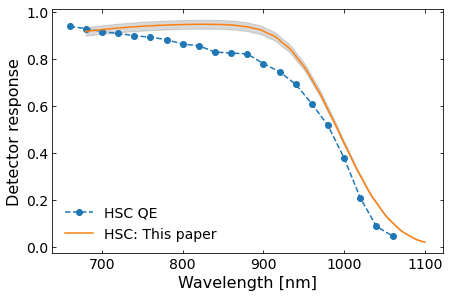

In [6]:
N = 1000
#qe_boxcar = np.convolve(QE, np.ones(N)/N, mode='same')
qe_boxcar = np.convolve(QE, np.ones(N)/N, mode='same')
#plt.plot(wavelength,QE)
#plt.plot(wavelength[1000:],QE[1000:],color = 'black')
plt.figure(figsize = (7,4.5))
plt.plot(HSC_qe_wlen[15:]/10,HSC_qe[15:],'o--',label = 'HSC QE')
#plt.plot(wavelength[600:],QE[600:],linewidth = 2, label = 'This paper')
plt.plot(wavelength[2000:],qe_boxcar[2000:],linewidth = 1.5, label = 'HSC: This paper')

plt.fill_between(wavelength[2000:], qe_boxcar[2000:] - qe_boxcar[2000:]*0.02, qe_boxcar[2000:] +qe_boxcar[2000:]*0.02,
                 color='grey', alpha=0.3)

plt.xlabel('Wavelength [nm]',fontsize = 16)
plt.ylabel('Detector response',fontsize = 16)
plt.legend(fontsize = 14,frameon = False)
#plt.plot(wavelength,QE2)
plt.yticks(fontsize = 14)
plt.xticks(fontsize=14);